In [1]:
# running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


# Data cleaning and preparation
1. Load file using pandas
2. Look for information
3. Fix any missing values

### Loading the file

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

### Basic analysis step 1 - Lookng for information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
#To find the number of columns with numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

13

## Basic analysis step 2 - Find missing values and cleaning the dataset

In [7]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

<Axes: >

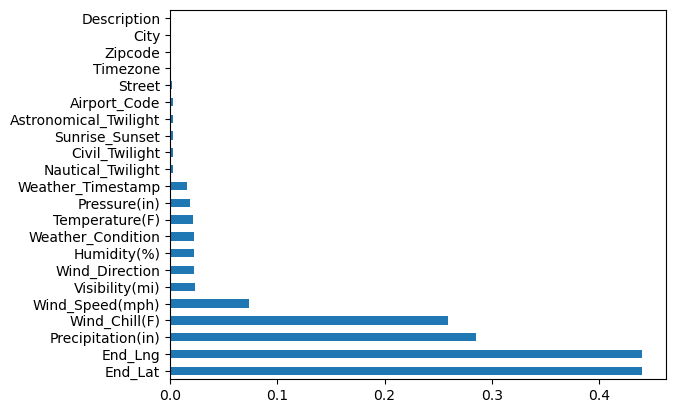

In [8]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [9]:
df = df.dropna()

# Data analysis and visualization
columns to analyse
1. city and state
2. start lat, long
3. Start Time
4. Temperature
5. Weather condition

### 1. City and State

In [10]:
#Find the number of unique cities
cities = df.City.unique()
len(cities)

10327

In [11]:
#Identify the cities with most accidents
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Miami                           142575
Los Angeles                      79444
Orlando                          74911
Dallas                           50074
Houston                          46197
                                 ...  
Dixfield                             1
Trexlertown                          1
Chestnutridge                        1
Mingo                                1
American Fork-Pleasant Grove         1
Name: City, Length: 10327, dtype: int64

In [12]:
# cities with highest number of accidents
cities_by_accidents[:50]

Miami              142575
Los Angeles         79444
Orlando             74911
Dallas              50074
Houston             46197
Charlotte           40228
San Diego           32473
Raleigh             31438
Nashville           28555
Sacramento          28421
Baton Rouge         26963
Minneapolis         26649
Austin              25101
Richmond            22524
New Orleans         22323
Phoenix             21595
Tucson              21094
Atlanta             20652
Portland            20343
Saint Paul          19374
Jacksonville        18290
Kansas City         16821
Bakersfield         15884
Riverside           15831
Hialeah             14481
Washington          14412
Bronx               14252
San Bernardino      13390
Columbia            13328
Chattanooga         12417
Ontario             12275
Tampa               12231
Fresno              11942
Rochester           11741
Fort Lauderdale     11628
Anaheim             11587
New York            11203
Salt Lake City      11156
Greenville  

In [13]:
# cities with lowest number of accidents
cities_by_accidents[-50:]

Fruitdale                       1
La Motte                        1
North Redington Beach           1
Lawtons                         1
La Mesa                         1
Natchitoches                    1
Dodge                           1
Bulverde                        1
River Oaks                      1
Leavittsburg                    1
Glenn Dale                      1
Seven Hills                     1
Old Bethpage                    1
Springport                      1
Hodgkins                        1
Pascagoula                      1
Thayer                          1
Ixonia                          1
Lone Jack                       1
West Gardiner                   1
Chepachet                       1
Garfield Heights                1
West Brooklyn                   1
Beavercreek Township            1
East Marion                     1
Olmito                          1
Kintnersville                   1
Wilkesville                     1
Faunsdale                       1
Stromsburg    

<Axes: >

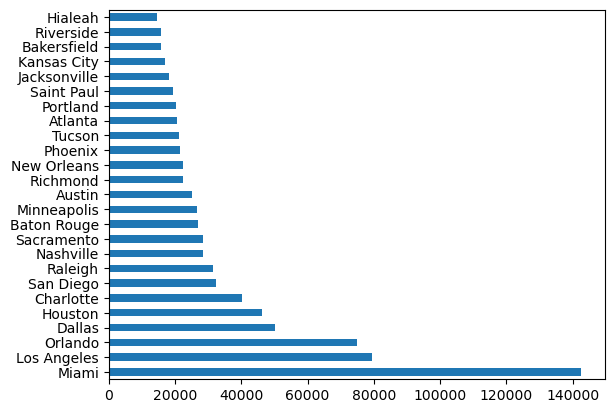

In [14]:
#ploting the cities with most accidents
cities_by_accidents[0:25].plot(kind='barh')

In [15]:
states_by_accident = df.State.value_counts()
states_by_accident

CA    880453
FL    529393
TX    178750
VA    176331
NY    168004
PA    161697
SC    136485
NC    132011
OR    125802
MN    116608
TN     74679
AZ     73067
NJ     72341
LA     68749
MD     66544
MI     55275
GA     53580
UT     45625
IL     42194
CT     41343
CO     36258
OH     32050
MO     32006
WA     31598
AL     26786
MT     26293
IN     23553
AR     18629
DC     13544
IA     11920
WI     11703
KS     11551
OK     11294
WV     11160
ID      8884
NV      7762
MS      6990
DE      6596
MA      5267
KY      4685
NE      3406
RI      2817
ND      2705
NM      2495
WY      2421
NH      1840
ME       989
VT       220
SD       196
Name: State, dtype: int64

In [16]:
import seaborn as sns
sns.set_style("darkgrid")

/tmp/ipykernel_97/1083794035.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accidents)


<Axes: xlabel='City', ylabel='Density'>

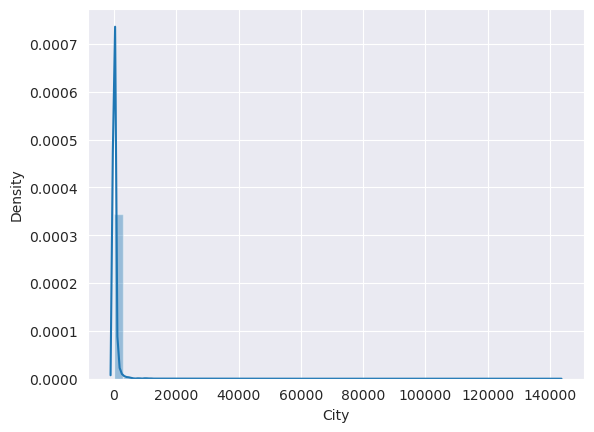

In [17]:
sns.distplot(cities_by_accidents)

In [18]:
high_accident_cities = cities_by_accidents[cities_by_accidents > 1000]
high_accident_cities_percentage = (len(high_accident_cities)/len(df.City.unique()))*100
high_accident_cities_percentage

5.955262903069623

In [19]:
low_accident_cities = cities_by_accidents[cities_by_accidents < 10]
low_accident_cities_percentage = (len(low_accident_cities)/len(df.City.unique()))*100
low_accident_cities_percentage

26.793841386656336

/tmp/ipykernel_97/2843252471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)


<Axes: xlabel='City', ylabel='Density'>

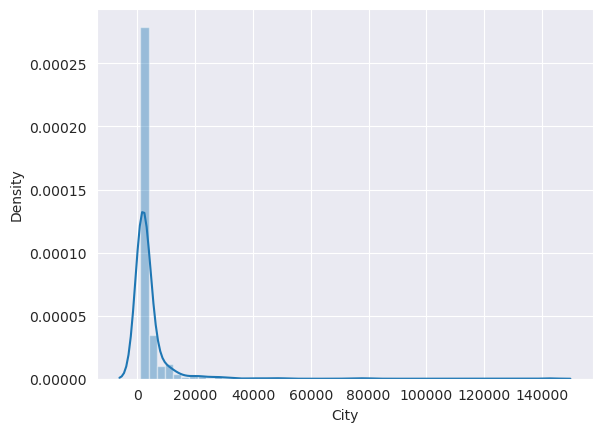

In [20]:
sns.distplot(high_accident_cities)

The above graph shows the number of cities decrease exponentially with increase in accidents

/tmp/ipykernel_97/469555131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


<Axes: xlabel='City', ylabel='Density'>

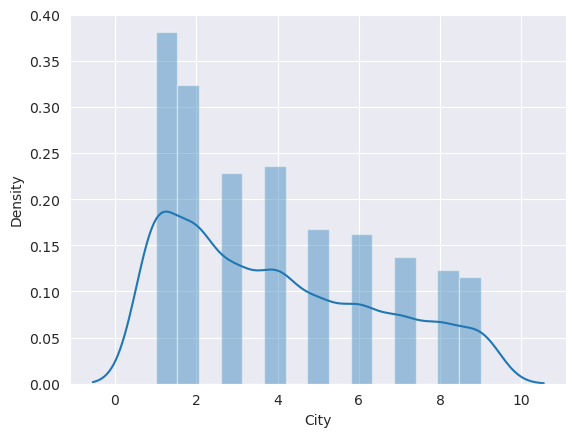

In [21]:
sns.distplot(low_accident_cities)

<Axes: xlabel='City', ylabel='Count'>

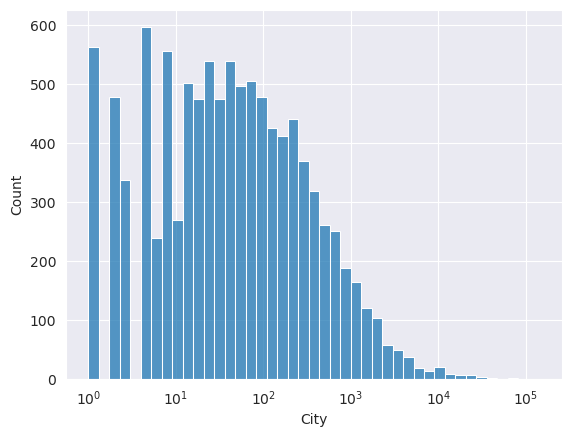

In [22]:
sns.histplot(cities_by_accidents, log_scale=True)

### 2. Start time

In [23]:
#converting start time to datetime format
df.Start_Time = pd.to_datetime(df.Start_Time)

<Axes: xlabel='Start_Time', ylabel='Count'>

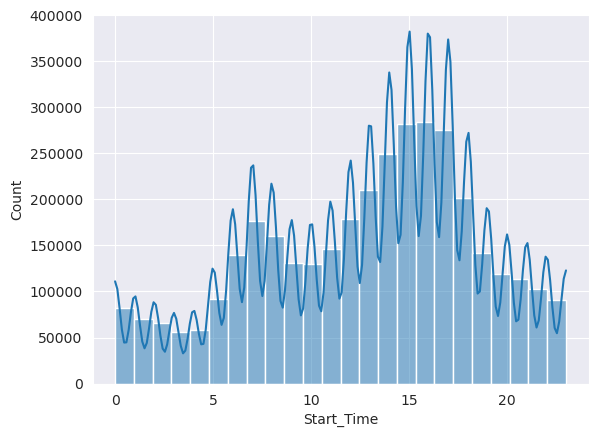

In [24]:
sns.histplot(df.Start_Time.dt.hour, kde=True, bins=24,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

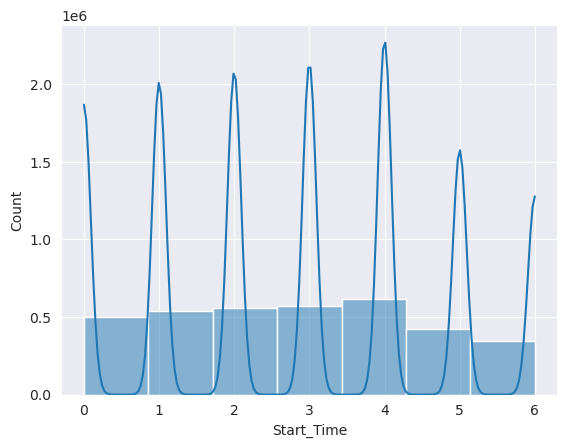

In [25]:
sns.histplot(df.Start_Time.dt.dayofweek, kde=True, bins=7,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

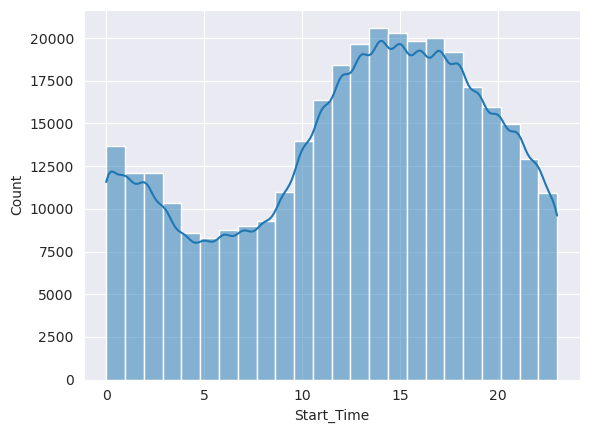

In [26]:
#analysing sundays trends
sunday_datetime = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sunday_datetime.dt.hour, kde=True, bins=24,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

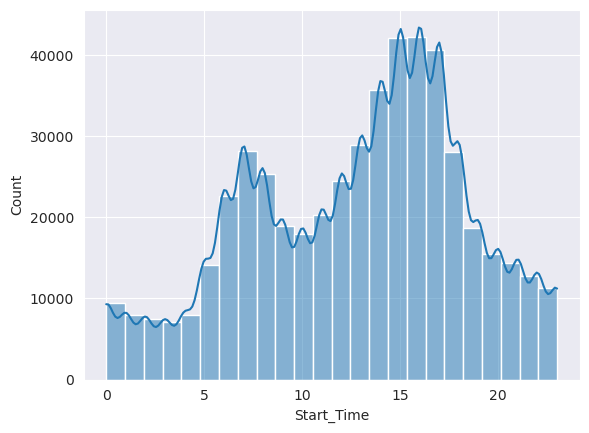

In [27]:
#Mondays trends(to represent weekdays)
monday_datetime = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(monday_datetime.dt.hour, kde=True, bins=24,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

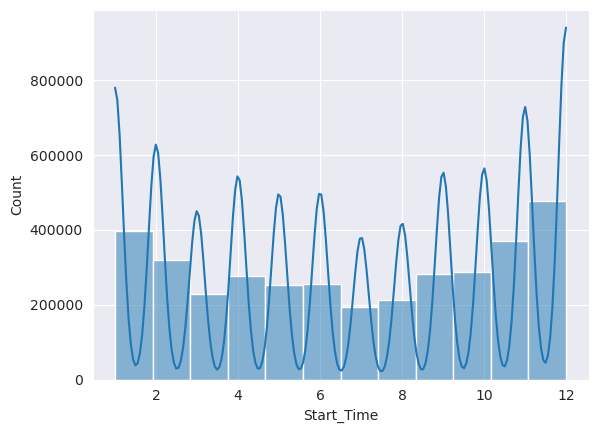

In [28]:
sns.histplot(df.Start_Time.dt.month, kde=True, bins=12,common_norm=True)

Year by year analysis - shows mismatch in data collected

<Axes: xlabel='Start_Time', ylabel='Count'>

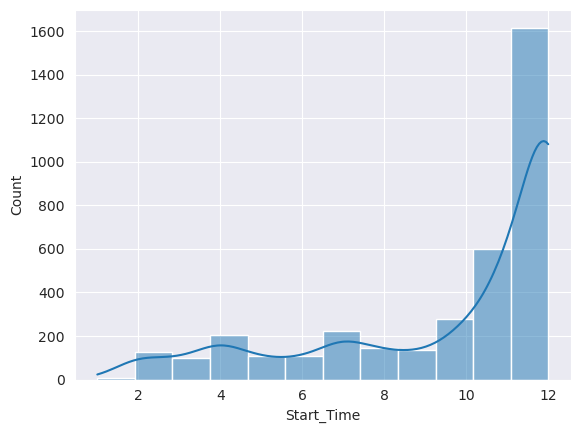

In [29]:
df_2016 = df.Start_Time[df.Start_Time.dt.year == 2016]
sns.histplot(df_2016.dt.month, kde=True, bins=12,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

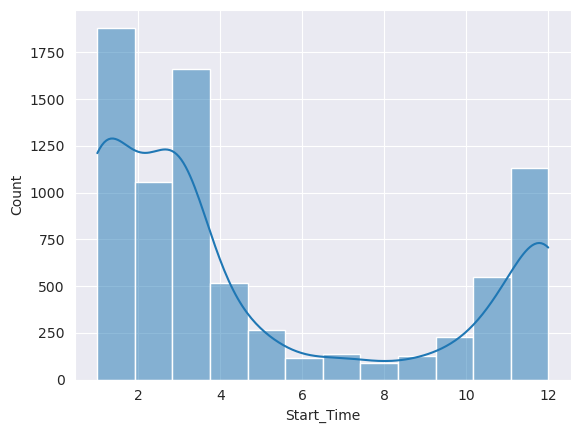

In [30]:
df_2017 = df.Start_Time[df.Start_Time.dt.year == 2017]
sns.histplot(df_2017.dt.month, kde=True, bins=12,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

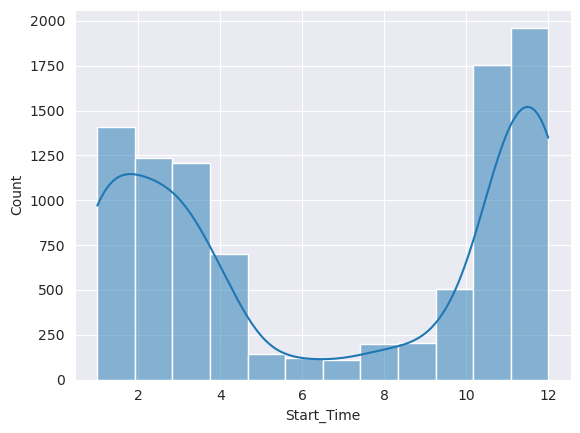

In [31]:
df_2018 = df.Start_Time[df.Start_Time.dt.year == 2018]
sns.histplot(df_2018.dt.month, kde=True, bins=12,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

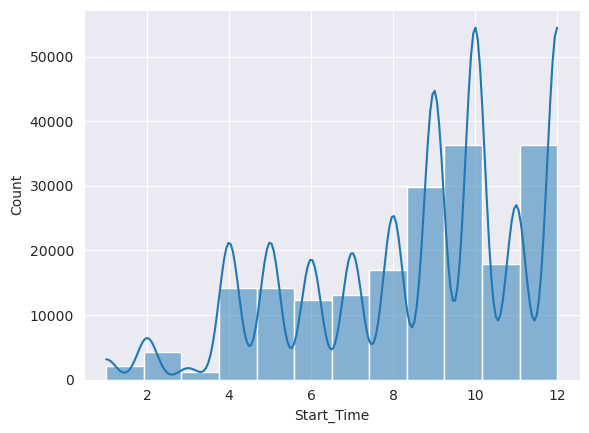

In [32]:
df_2019 = df.Start_Time[df.Start_Time.dt.year == 2019]
sns.histplot(df_2019.dt.month, kde=True, bins=12,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

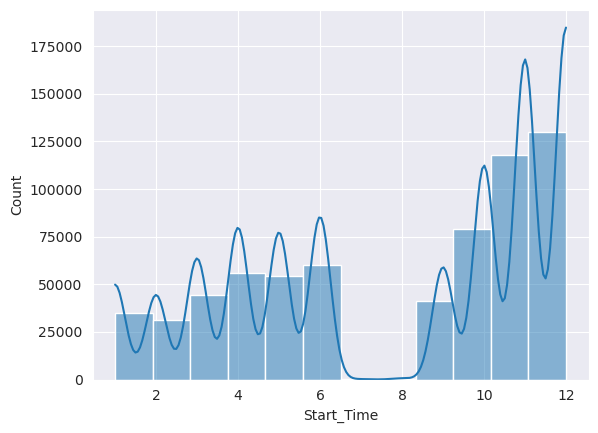

In [33]:
df_2020 = df.Start_Time[df.Start_Time.dt.year == 2020]
sns.histplot(df_2020.dt.month, kde=True, bins=12,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

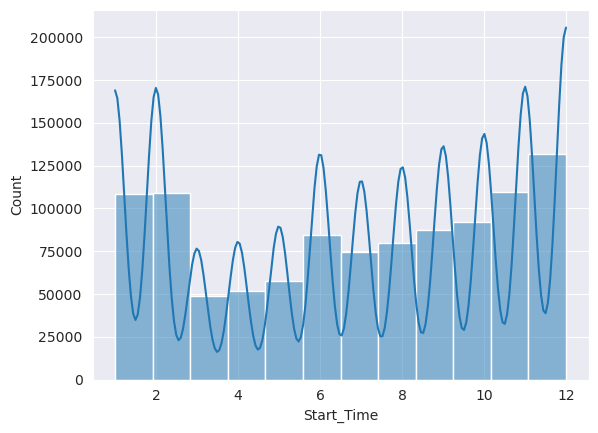

In [34]:
df_2021 = df.Start_Time[df.Start_Time.dt.year == 2021]
sns.histplot(df_2021.dt.month, kde=True, bins=12,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

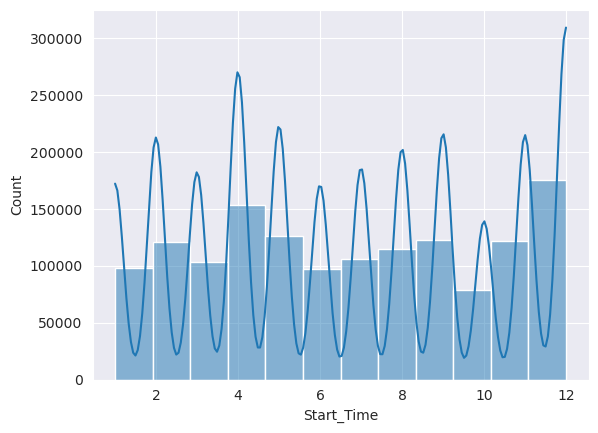

In [35]:
df_2022 = df.Start_Time[df.Start_Time.dt.year == 2022]
sns.histplot(df_2022.dt.month, kde=True, bins=12,common_norm=True)

<Axes: xlabel='Start_Time', ylabel='Count'>

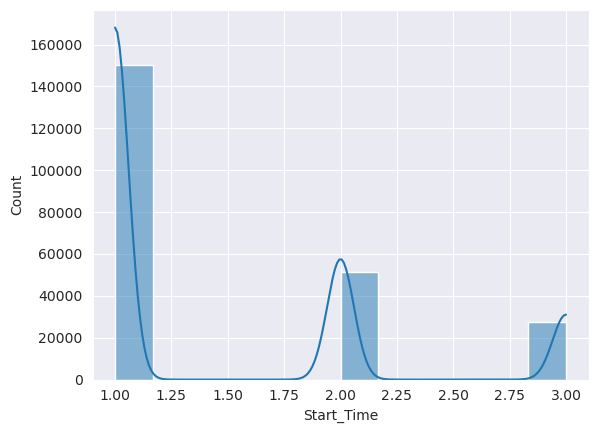

In [36]:
df_2023 = df.Start_Time[df.Start_Time.dt.year == 2023]
sns.histplot(df_2023.dt.month, kde=True, bins=12,common_norm=True)

Check by source

<Axes: xlabel='Start_Time', ylabel='Count'>

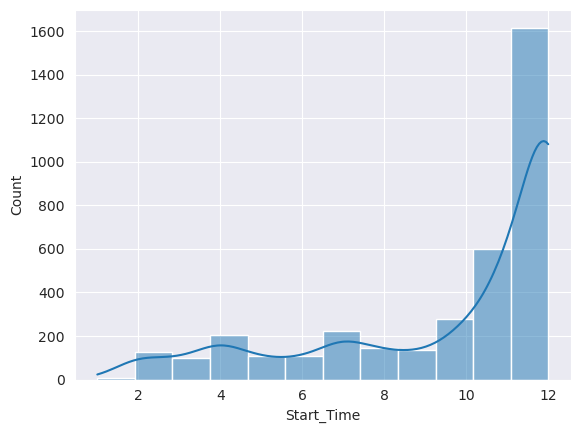

In [37]:
df_2016 = df[df.Start_Time.dt.year == 2016]
df_2016_source1 = df_2016[df_2016.Source == 'Source1']
sns.histplot(df_2016_source1.Start_Time.dt.month, kde=True, bins=12,common_norm=True)

<Axes: >

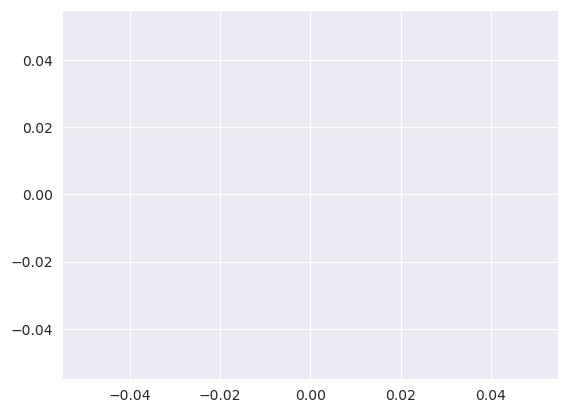

In [38]:
df_2016 = df[df.Start_Time.dt.year == 2016]
df_2016_source2 = df_2016[df_2016.Source == 'Source2']
sns.histplot(df_2016_source2.Start_Time.dt.month, kde=True, bins=12,common_norm=True)

<Axes: ylabel='Source'>

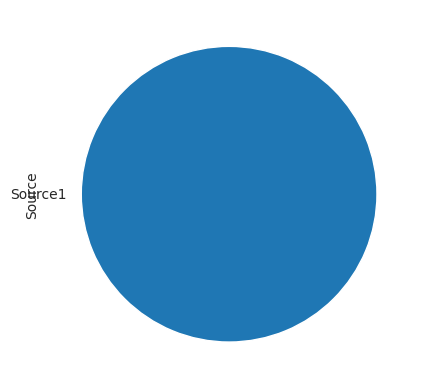

In [39]:
df.Source.value_counts().plot(kind = 'pie')

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

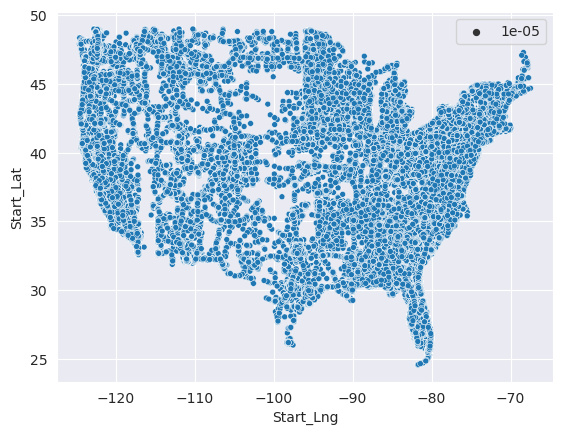

In [40]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size=0.00001)

In [41]:
import folium
from folium.plugins import HeatMap

In [42]:
co_ordinates = list(zip(list(df.Start_Lat),list(df.Start_Lng)))

In [45]:
map = folium.Map()
HeatMap(co_ordinates).add_to(map)

In [ ]:
map